(This could be our final notebook for project submission)

In [1]:
import pandas as pd
import os
from config import *
import json
import glob

### Overview of the data (Thomson Reuters News Articles)

This dataset contains articles from 1996 - 2020.
The total number of English articles that talk about the US: 

In [2]:
# Notebook that generates count is called 'generate_all_us_article_count.ipynb'
# Output stored at "All_US_Article_Count.csv"
df = pd.read_csv(os.path.join(TEMP_PATH, 'All_US_Article_Count.csv'), index_col=[0])
df.Count.sum()

19878246

In [3]:
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

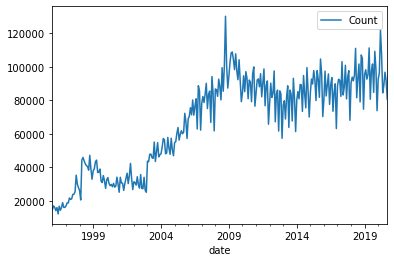

In [4]:
df.plot()

This plot depicts the article count over the years (English, about the US only)

### Step 1: Filtering the articles based on our themes

We looked into the dataset specifications and identified some tags that were helpful to start our analysis (instead of using a bag of words, word2vec similarity approach, and identifying articles related to "Inflation", "GDP" and "Volatility"

Specifically, Reuters classifies articles based on whether they talk about certain economic indicators. We were able to find exact classifications for Inflation and GDP, but not for Volatility.

#### 1.a. Inflation

We filter the articles each year for the topic 'N2:INFL'. This part of the processing was executed on the grid with the output being a json files for each year that contain the filename and the article ids that talk about inflation.

The processing was undertaken in `Inflation_filter.py`

Command run: `sge_run --grid_submit=batch --grid_mem=25G --grid_SGE_TASK_ID=1-25 ./Inflation_filter.py`


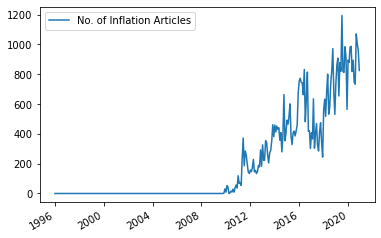

In [5]:
# Looking at the number of articles over the years
infl_files = glob.glob(TEMP_PATH + '/Inflation/*.json')

article_count = dict()
for infl_file in infl_files:
    f = open(infl_file)
    data = json.load(f)
    for key in data:
        yyyymm = key[-15:-9]
        article_count[yyyymm] = len(data[key])
    f.close()

article_count = pd.DataFrame.from_dict(article_count, orient='index')

article_count.index = pd.to_datetime(article_count.index, format='%Y%m')
# article_count.sort_index(inplace=True)
article_count.rename(columns={0: 'No. of Inflation Articles'}, inplace=True)

article_count.plot()

In [6]:
article_count['No. of Inflation Articles'].sum()

60096

#### 1.b. GDP

We filter the articles each year for the topic 'N2:GDP'. This part of the processing was also executed on the grid as above.

The processing was undertaken in `GDP_filter.py`

Command run: `sge_run --grid_submit=batch --grid_mem=25G --grid_SGE_TASK_ID=1-25 ./GDP_filter.py`

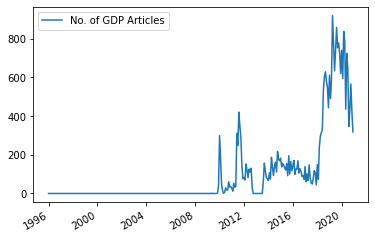

In [7]:
# Looking at the number of articles over the years
gdp_files = glob.glob(TEMP_PATH + '/GDP/*.json')

article_count = dict()
for gdp_file in gdp_files:
    f = open(gdp_file)
    data = json.load(f)
    for key in data:
        yyyymm = key[-15:-9]
        article_count[yyyymm] = len(data[key])
    f.close()

article_count = pd.DataFrame.from_dict(article_count, orient='index')

article_count.index = pd.to_datetime(article_count.index, format='%Y%m')
# article_count.sort_index(inplace=True)
article_count.rename(columns={0: 'No. of GDP Articles'}, inplace=True)

article_count.plot()

In [8]:
article_count['No. of GDP Articles'].sum()

30082